<a href="https://colab.research.google.com/github/Shanu-Mathew/Tensorflow-Notes/blob/main/Neural_Network_Regression_(Tensorflow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definitions for a regression problem but in our case, we are going to somplify it: Predicting a numerical variable based on some other combination of variables, even shorter...predicting a number

### Importing Libraries

In [5]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import matplotlib.pyplot as plt

2.12.0


##Data Ingestion

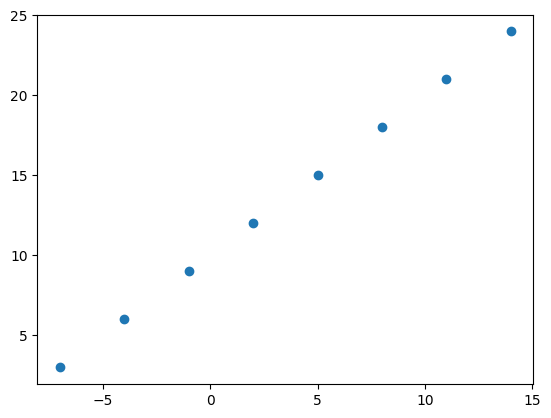

In [6]:
#Create Features
X=np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0])

#Create labels
y=np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0])

#Visualisation
plt.scatter(X,y);

In [7]:
y ==X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [8]:
#Create a demo tensor
house_info=tf.constant(['bedroom','bathroom','garage'])
house_price=tf.constant([937000])
house_info,house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([937000], dtype=int32)>)

In [9]:
input_shape=X.shape
output_shape=y.shape
input_shape,output_shape

((8,), (8,))

In [10]:
X[0],y[0]

(-7.0, 3.0)

In [11]:
X[1],y[1]

(-4.0, 6.0)

In [12]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape,output_shape

((), ())

In [13]:
X[0].ndim

0

In [14]:
#Numpy array into tensors with dtype float32
X=tf.cast(tf.constant(X),dtype=tf.float32)
y=tf.cast(tf.constant(y),dtype=tf.float32)
X,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
input_shape=X[0].shape
output_shape=y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with Tensorflow
1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and the evaluation metrics (which we can use to interpret the performance of our model)
3. Fitting a model -  Letting the model try to find patterns between X & y (features and Labels)

In [16]:
from keras.engine.training import optimizer
# Set Random Seed
tf.random.set_seed(42)

#1. Create a model using the Sequential API
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=5);

Epoch 1/5
1/1 [==============================] - 1s 523ms/step - loss: 13.7942 - mae: 13.7942
Epoch 2/5
1/1 [==============================] - 0s 20ms/step - loss: 13.6617 - mae: 13.6617
Epoch 3/5
1/1 [==============================] - 0s 12ms/step - loss: 13.5292 - mae: 13.5292
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 13.3967 - mae: 13.3967
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 13.2642 - mae: 13.2642


In [17]:
# Making prediction
y_pred=model.predict([17.0])
y_pred

1/1 [==============================] - 0s 96ms/step


array([[1.5959543]], dtype=float32)

## Improving  our Model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** -
    * We might add more layers,
    * Increase the number of hidden units (all called neurons) within each of the hidden layers
    * Change the activation function of each layer.
2. **Compiling a model** -
    * Change the optimization function or **learning rate** of the optimization function
3. **Fitting a model** -
    * Fit a model for more epochs
    * Fit a model with more data (& give the model more examples to learn from)


In [18]:
#Improve the model

#1. Create the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

#3. Fitting the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100) #Epochs means how many times the model refines on the training data

Epoch 1/100
1/1 [==============================] - 0s 390ms/step - loss: 9.1650 - mae: 9.1650
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 9.0325 - mae: 9.0325
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 8.9000 - mae: 8.9000
Epoch 4/100
1/1 [==============================] - 0s 18ms/step - loss: 8.7675 - mae: 8.7675
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 8.6350 - mae: 8.6350
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 8.5025 - mae: 8.5025
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 8.3700 - mae: 8.3700
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.2375 - mae: 8.2375
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 8.1050 - mae: 8.1050
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 7.9725 - mae: 7.9725
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - l

In [19]:
#Prediction of values by new model
model.predict([17.0])

1/1 [==============================] - 0s 151ms/step


array([[30.170622]], dtype=float32)

In [20]:
#Improving Model more

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(1)
])
#2. Compiling the model
model.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 899ms/step - loss: 11.7376 - mae: 11.7376
Epoch 2/100
1/1 [==============================] - 0s 20ms/step - loss: 11.6705 - mae: 11.6705
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 11.6034 - mae: 11.6034
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 11.5362 - mae: 11.5362
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.4690 - mae: 11.4690
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 11.4018 - mae: 11.4018
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 11.3345 - mae: 11.3345
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 11.2671 - mae: 11.2671
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 11.1996 - mae: 11.1996
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 11.1321 - mae: 11.1321
Epoch 11/100
1/1 [==============================] 

In [21]:
#Predicting the values
model.predict([27.0])

1/1 [==============================] - 0s 167ms/step


array([[44.12897]], dtype=float32)

In [22]:
#Improving Model more

#1. Create the model (this time with an extra hidden layer with 100 hidden units)
model=tf.keras.Sequential([
    tf.keras.layers.Dense(50,activation=None),
    tf.keras.layers.Dense(1)
])
#2. Compiling the model
model.compile(loss="mae",
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=["mae"])

#3. Fit the model
model.fit(tf.expand_dims(X,axis=-1),y,epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 983ms/step - loss: 13.4896 - mae: 13.4896
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 12.8507 - mae: 12.8507
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 12.2116 - mae: 12.2116
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5693 - mae: 11.5693
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 10.9210 - mae: 10.9210
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2642 - mae: 10.2642
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 9.5964 - mae: 9.5964
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 8.9144 - mae: 8.9144
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 8.2154 - mae: 8.2154
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 7.4966 - mae: 7.4966
Epoch 11/100
1/1 [==============================] - 0s 9

In [23]:
#Predicting the values
model.predict([27.0])

1/1 [==============================] - 0s 100ms/step


array([[37.33923]], dtype=float32)

## Evaluating a Model
In practice, a typical workflow, you'll go through when building a neural network is:

```
Build a model -> Fit the Model -> Evaluate the model -> Tweak the model -> Fit the model -> Evaluate the model
```

When we are evaluating the models, We should always visualise.

It is good to visualize:-
* The data
* The model itself
* The training of a model
* The predictions of a model


In [24]:
# Make a bigger dataset
X=tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [25]:
# Make labels for the dataset
y=X+10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

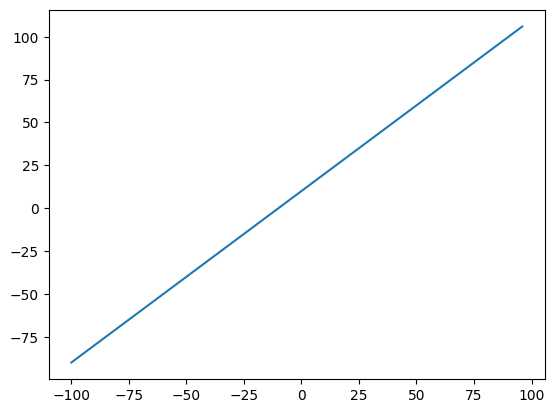

In [26]:
#Visualise the data
plt.plot(X,y)

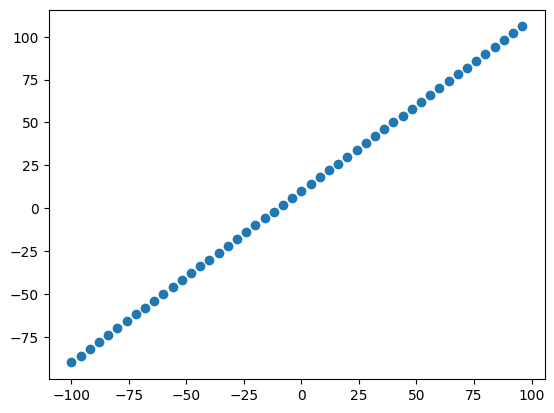

In [27]:
plt.scatter(X,y)

### The 3 sets....
* **Training Set** - The model learns from this data , typically 7-80% of the total data.
* **Validation Set** - The models gets tunes on this data, which is typically 10-15% of the data available
* **Test Set** - The model gets evaluated on this data, which is typically 10-15% of the data available.



In [28]:
len(X)

50

In [29]:
#Train Test Split
X_train=X[:40] #first 40 are training samples (80% of the data)
y_train=y[:40]

X_test=X[40:] #last 10 are testing samples (20% of the data)
y_test=y[40:]

len(X_train),len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualising Training and Testing Data

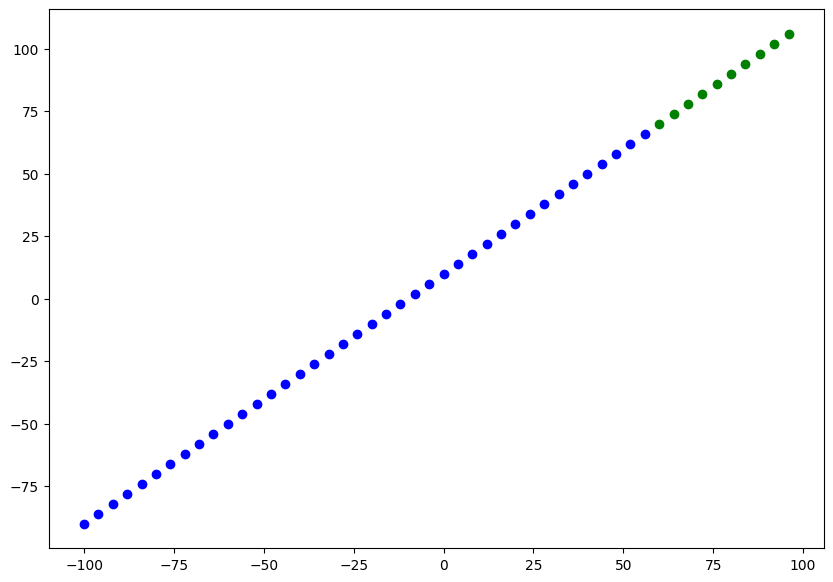

In [30]:
plt.figure(figsize=(10,7))

# Plot training data in blue
plt.scatter(X_train,y_train,c="b",label="Training Data")

# Plot the testing data in green
plt.scatter(X_test,y_test,c="g",label="Test Data")

### Building Neural Network for the new Data

In [31]:
#1. Create a model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

#3. Fit the model
#model.fit(tf.expand_dims(X_train,axis=-1),y_train,epochs=100)

### Visualising the new Neural Network Model


In [33]:
#model.summary()

In [34]:
tf.random.set_seed(42)

#1. Creating the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(100,input_shape=[1])
])

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [35]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               200       
                                                                 
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable Parameteres - These are the parameters (patterns) the model can update as it trains.
* Non-trainable params - These parameters aren't updated during training ( this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**


**Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.


In [36]:
# Fitting the model
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 40.3510 - mae: 40.3510
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 40.0037 - mae: 40.0037
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 39.6341 - mae: 39.6341
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 39.2805 - mae: 39.2805
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 38.9240 - mae: 38.9240
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 38.5871 - mae: 38.5871
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 38.2534 - mae: 38.2534
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 37.8938 - mae: 37.8938
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 37.4869 - mae: 37.4869
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 37.1207 - mae: 37.1207
Epoch 11/100
2/2 [==============================] - 0s 

In [37]:
#Get a summary of our model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               200       
                                                                 
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________


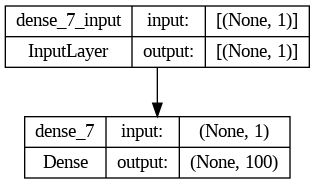

In [38]:
from tensorflow.keras.utils import plot_model
plot_model(model=model,show_shapes=True)

In [39]:
#Creating another with output layer specified
tf.random.set_seed(42)

#1. Creating the model
model=tf.keras.Sequential([
    tf.keras.layers.Dense(20,input_shape=[1]),
    tf.keras.layers.Dense(1,name="output_layer")
],name="ModelTry1")

#2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])
#3. Fitting the model
model.fit(X_train,y_train,epochs=100,verbose=0)

In [40]:
model.summary()

Model: "ModelTry1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                40        
                                                                 
 output_layer (Dense)        (None, 1)                 21        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


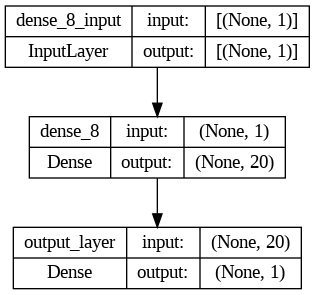

In [41]:
plot_model(model,show_shapes=True)

### Visualising our Model's Prediction

In [42]:
#Making prediction
y_pred=model.predict(X_test)
y_pred

1/1 [==============================] - 0s 60ms/step


array([[ 76.5421  ],
       [ 81.52796 ],
       [ 86.51381 ],
       [ 91.49966 ],
       [ 96.48551 ],
       [101.47137 ],
       [106.457214],
       [111.44307 ],
       [116.42892 ],
       [121.41478 ]], dtype=float32)

In [43]:
#Plotting Function
def plot_predictions(train_data=X_train,
                     train_label=y_train,
                     test_data=X_test,
                     test_label=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10,7))
  #Plot training data in blue
  plt.scatter(train_data,train_label,c="b",label="Training data")

  #Plot test data in green
  plt.scatter(test_data,test_label,c="g",label="Testing data")

  #Plot model's prediction in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  #Showing the legend
  plt.legend();


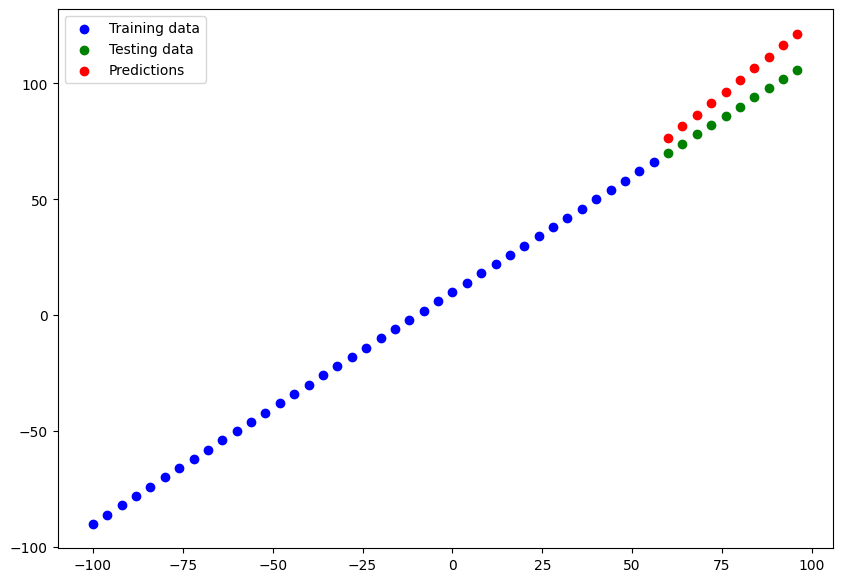

In [44]:
plot_predictions()

### Evaluating Model Prediction using Regression Metrics

Some of the main metrics that we will use for evaluating our model are:
* MAE = Mean Absolute Error
* MSE = Mean Square Error
* Huber = Combination of MAE and MSE, Less sensitive to outliers than MSE

**Note:- You need to have Y_pred as a tensor and with the same shape as Y_test so that you can compare them properly**

In [45]:
#Evaluate the model on the test data
model.evaluate(X_test,y_test)
#[loss,mae] as defined in the model compilation

1/1 [==============================] - 0s 149ms/step - loss: 10.9784 - mae: 10.9784


[10.978437423706055, 10.978437423706055]

In [46]:
# Calculate Mean Absolute Error
mae=tf.metrics.mean_absolute_error(y_test,tf.constant(y_pred,shape=(10,)))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.978438>

In [47]:
#Calculate the mean squared error
mse=tf.metrics.mean_squared_error(y_test,tf.constant(y_pred,shape=(10,)))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=128.54434>

In [48]:
#Function to return MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_test,tf.constant(y_pred,shape=(10,)))

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_test,tf.constant(y_pred,shape=(10,)))

### Running experiments to improve our model

1. Get more data- get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - This might come in the form of more layers or more hidden units in each layer.

3. Train for longer - give your model more of a chance to find patterns in the data.

Trying different models:-
1. `model 1` - same as the original model, 1 layer, trained for 100 epochs
2. `model 2` - 2 layers, trained for 100 epochs
3. `model 3` - 2 layers, trained for 500 epochs

**Model 1**

In [49]:
#Random Seed
tf.random.set_seed(42)

#1. Create the model
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

#2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
#3. Fitting the model
model_1.fit(X_train,y_train,epochs=100,verbose=0)

1/1 [==============================] - 0s 54ms/step


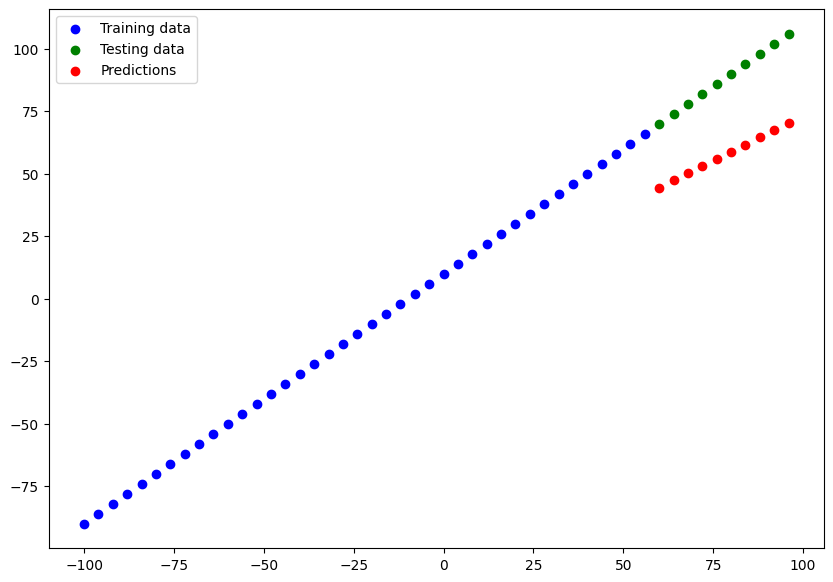

In [50]:
#Plotting Predictions for model_1
y_preds_1=model_1.predict(X_test)
plot_predictions(predictions= y_preds_1)

In [51]:
#Model 1 Calculation metrics
mae_1=mae(y_test,y_preds_1)
mse_1=mse(y_test,y_preds_1)

mae_1,mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=30.608759>,
 <tf.Tensor: shape=(), dtype=float32, numpy=947.30237>)

**Model 2**

In [52]:
#Random Seed
tf.random.set_seed(42)

#1. Create the model
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1,input_shape=[1])
])

#2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae","mse"])
#3. Fitting the model
model_2.fit(X_train,y_train,epochs=100,verbose=0)

1/1 [==============================] - 0s 57ms/step


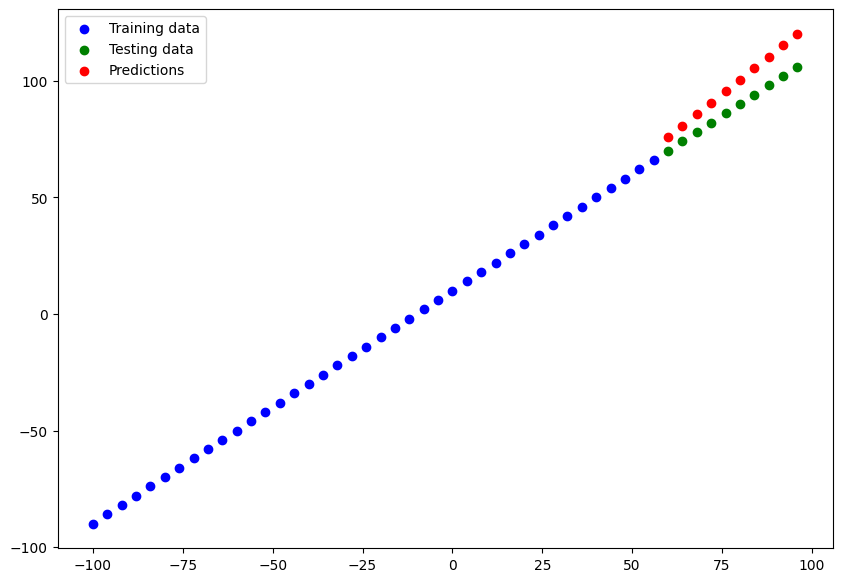

In [53]:
#Plotting Predictions for model_1
y_preds_2=model_2.predict(X_test)
plot_predictions(predictions= y_preds_2)

In [54]:
#Model 2 Calculation metrics
mae_2=mae(y_test,y_preds_2)
mse_2=mse(y_test,y_preds_2)

mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=9.957228>,
 <tf.Tensor: shape=(), dtype=float32, numpy=106.37447>)

**Model 3**

In [55]:
#Random Seed
tf.random.set_seed(42)

#1. Create the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1,input_shape=[1])
])

#2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae","mse"])
#3. Fitting the model
model_3.fit(X_train,y_train,epochs=500,verbose=0)

1/1 [==============================] - 0s 86ms/step


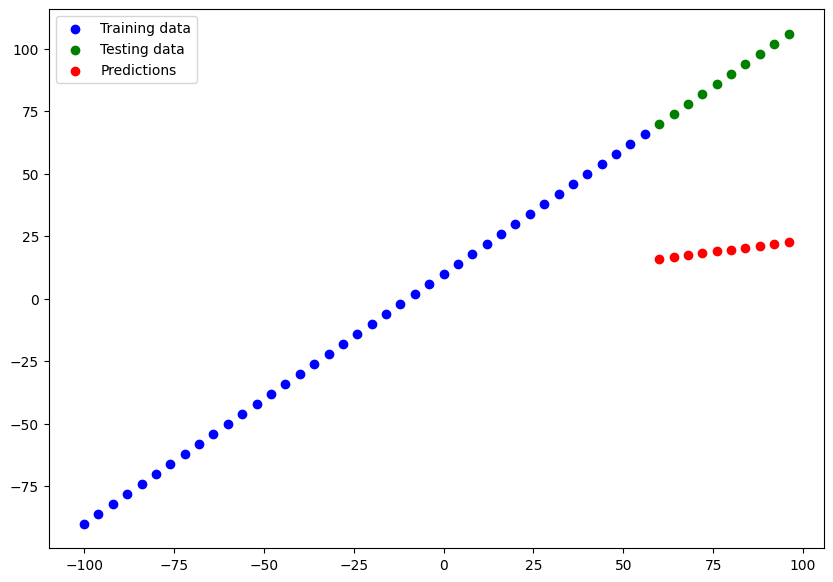

In [56]:
#Plotting Predictions for model_1
y_preds_3=model_3.predict(X_test)
plot_predictions(predictions= y_preds_3)

In [57]:
#Model 3 Calculation metrics
mae_3=mae(y_test,y_preds_3)
mse_3=mse(y_test,y_preds_3)

mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.691505>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4804.91>)

### Comparing the results of our experiments

In [64]:
# Comparing Model Results
import pandas as pd

model_results=[["model_1",mae_1.numpy(),mse_1.numpy()],
                ["model_2",mae_2.numpy(),mse_2.numpy()],
                ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,30.608759,947.302368
1,model_2,9.957228,106.374474
2,model_3,68.691505,4804.910156


 #### Tracking Experiments
 It is very good to track the results of your experiments.

 Tools that can help us:-

 1) TensorBoard - A component of the Tensorflow library to help track modelling
 experiments.

 2) Weights & Biases - A tool for tracking all of kinds of machine learning
 experiments.


### Saving our models
There are two main formats we can save our model as:-
1. The SavedModel format
2. The HDFS5 Format


In [70]:
# Using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [68]:
# Using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

### Loading the models

In [73]:
#Loading SavedModel Model
loaded_SavedModel_format=tf.keras.models.load_model("best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [77]:
#Loading H5 Model
loaded_h5_model=tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 10)                20        
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


### Download a model (or any other file)

In [78]:
from google.colab import files
files.download('/content/best_model_HDF5_format.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#Copy the file from colab to google drive
!cp /content/best_model_HDF5_format.h5 Google drive path